**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#Sci-kit-learn PCA and Logistic Regression Implementation   


**Logistic Regression**   

Logistic regression is a simple yet powerful algorithm used for classification tasks, where the goal is to predict one of two possible outcomes.  
It works by applying the sigmoid function, $f(z) = \frac{1}{1 + e^{-z}}$, to a linear combination of input features, producing a probability score that indicates the likelihood of belonging to a particular class. Despite its simplicity, logistic regression is widely used as a baseline model for tasks like spam detection and sentiment analysis, offering interpretability and solid performance on linearly separable data.  
Please refer to the lecture notes on a general description of the logistic regression algorithm.

<br>

**Principal Component Analysis (PCA)**   

The goal of PCA, is to reduce the number of dimensions represented by the independent variables (features) in our dataset. We do this by transforming the features as linear combinations onto a new set of axes with reduced dimensionality. The transformation will satisfy the following:
- Features are linearly independent (orthogonal).
- Dimensions are reduced based on projecting data onto axes which result in the largest variance, since this provides the most information about the data.
- The new dimensions will be created by projecting the original features onto transformed (e.g. rotated) axes.

<br>

In this assignment, you will model a 30-feature dataset with Logistic Regression, then experiment with PCA to reduce the dimensions of the dataset and evaluate the classification performance.

<br>

Follow the instructions in the code cell to complete and test your code. You will replace all triple underscores (___) with your code.
Please refer to the lecture slides for details on each of the functions/algorithms and hints on the implementation.

In [1]:
# Environment setup and dataset load functions
# No coding needed.  Run this cell to set up your environment and load the dataset.

from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# This dataset and others are described here:  https://scikit-learn.org/stable/datasets.html
breast_cancer = load_breast_cancer()

# Printout info about the dataset.
# Note the attributes that can be accessed to printout useful information.
print('Number of dataset features:', len(breast_cancer.feature_names))
print('Dataset feature names:\n', breast_cancer.feature_names)
print('Dataset data:\n', breast_cancer.data)
print('Dataset label names:\n', breast_cancer.target_names)
print('Dataset labels:\n', breast_cancer.target)
print('Dataset label split:\n', np.array(np.unique(breast_cancer.target, return_counts=True)))

Number of dataset features: 30
Dataset feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Dataset data:
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ...

**Step 1:**  

Load the 30 breast cancer features and diagnosis result from dataset into a Pandas dataframe.   

- Hint:  https://pandas.pydata.org/docs/reference/frame.html  
- Hint:  https://scikit-learn.org/0.22/modules/generated/sklearn.datasets.load_breast_cancer.html   
- Hint:  use breast_cancer attributes from the imported breast_cancer_dataset (.data, .feature_names, .target)  

In [2]:
# Step 1:
# Load features and diagnosis from dataset into dataframe:

df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['diagnosis'] = pd.DataFrame(breast_cancer.target)



#For verification purposes - do not change code below this line.
import doctest

"""
  >>> print(df['mean concave points'].iloc[0])
  0.1471
  >>> print(df['worst fractal dimension'].iloc[150])
  0.06435
  >>> print(df['diagnosis'].iloc[200])
  1
  >>> print(df['mean symmetry'].iloc[568])
  0.1587
"""

doctest.testmod()

TestResults(failed=0, attempted=4)

**Step 2:**   

Train and test a model using all the features with Logistic regression   
Note, the dataset is described here:  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
-     Use the unscaled (raw) dataset - we will scale and rerun in the following step.
-     Use a train/test split of 70/30 (30% test)
-     Hint:  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
-     Hint:  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
-     Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit
-     Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score


In [3]:
#Step 2:

# Train and test a model using all the features with Logistic regression
# Assign indep and dep vars (X, y) from your dataframe
# Generate training split (X_train, X_test, y_train, y_test)
# Perform Logistic Regresssion on your training data
# Generate the score of your model (e.g. _.score(X_test, y_test))

# Extract the features from the dataframe into X.
X = df.drop('diagnosis', axis=1)

# Extract the labels from the dataframe into y.
# Note that the lables(diagnosis) are the last column in the dataframe.
y = df['diagnosis']

# Split the dataset into train and test.
# Set a seed (random_state) for reproducibility.
# Use the code below to set the seed and split the data into train and test sets.
random_state = 12
X_train, X_test, y_train, y_test =  train_test_split(X, y,
                                        test_size = 0.3,
                                        shuffle = True,
                                        random_state=random_state)


# Initialize a logistic regression reference.  Set the max iterations to 5000.
log_reg = LogisticRegression(max_iter=5000)

# Train (fit) the model.
# Hint: use the train data here.
log_reg.fit(X_train, y_train)

#y_hat = log_reg.predict(X_test)

# Record the score.
# Hint: use the test data here.
log_reg_score = log_reg.score(X_test, y_test)
print('Logistic regression model score on UNSCALED dataset (all features):', log_reg_score)



#For verification purposes - do not change code below this line.
import doctest

"""
  >>> np.isclose(log_reg_score, 0.9239766081871345, atol=1e-03)
  True
"""

doctest.testmod()

Logistic regression model score on UNSCALED dataset (all features): 0.9239766081871345
**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    np.isclose(log_reg_score, 0.9239766081871345, atol=1e-03)
Expected:
    True
Got:
    np.True_
**********************************************************************
1 items had failures:
   1 of   1 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

**Step 3:**  

Scale data using Standard Scaling for PCA processing.
-    Rerun logistic regression model on the scaled data to have apples to apples comparison on score after reducing the dimensions via PCA.
-    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
-    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform


In [6]:
# Step 3:

# Scale data using Standard Scaling - this will be for PCA processing
# Generate training split (X_train_scaled, X_test_scaled, y_train, y_test) with same split as Step 1.
# Perform Logistic Regresssion on your training data (X_train_scaled, y_train)
# Generate the score of your model (e.g. _scaled.score(X_test_scaled, y_test))

# Initialize a standard scalar
sc = StandardScaler()

# Scale the original dataset features (X)
X_scaled = sc.fit_transform(X)

# Split the dataset into scaled train and test data.
# Use the same split and random_state as the previous split.
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y,
                                        test_size = 0.3,
                                        shuffle = True,
                                        random_state=random_state)

# Train the model using Logistic Regression.  Set the max iterations to 5000.
# Hint: initialize the logistic regression reference and run the fit funciton.
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_scaled, y_train)

#Record the score
log_reg_scaled_score = log_reg_scaled.score(X_test_scaled, y_test)
print('Logistic regression model score on SCALED dataset (all features):', log_reg_scaled_score)


#For verification purposes - do not change code below this line.
import doctest

"""
  >>> np.isclose(log_reg_scaled_score, 0.9824561403508771, atol=1e-03)
  True
"""

doctest.testmod()

Logistic regression model score on SCALED dataset (all features): 0.9824561403508771
**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    np.isclose(log_reg_scaled_score, 0.9824561403508771, atol=1e-03)
Expected:
    True
Got:
    np.True_
**********************************************************************
1 items had failures:
   1 of   1 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

**Step 4:**   
Perform PCA keeping all components.
-   Make sure to perform PCA using the scaled data
-   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
-   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit

In [8]:
# Step 4:

# Perform PCA keeping all components.
# Hint use 'None" to keep all components

#components = None
pca = PCA(n_components=None)

# Perform PCA on the SCALED data, keeping all components
pca.fit(X_scaled)
print('Explained variance:', pca.explained_variance_ratio_)


#For verification purposes - do not change code below this line.
import doctest

"""
  >>> np.isclose(pca.explained_variance_ratio_[0], 0.44272025607526366, atol=1e-03)
  True
  >>> np.isclose(pca.explained_variance_ratio_[14], 0.0031378321676274047, atol=1e-03)
  True
  >>> np.isclose(pca.explained_variance_ratio_[29], 4.434827427363563e-06, atol=1e-03)
  True
"""

doctest.testmod()

Explained variance: [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    np.isclose(pca.explained_variance_ratio_[0], 0.44272025607526366, atol=1e-03)
Expected:
    True
Got:
    np.True_
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    np.isclose(pca.explained_variance_ratio_[14], 0.0031378321676274047, atol=1e-03)
Expected:
    True
Got:
    np.True_
********************************

TestResults(failed=3, attempted=3)

**Step 5:**   

Generate the explained variances and generate a Scree plot to view cumulative variances
-  Interpret the results in the following text cell.
-  How much data variability does the 1st PC capture?
-  How much data variability does the 1st + 2nd PCs capture?
-  Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
-  Hint:  https://numpy.org/doc/2.1/reference/generated/numpy.cumsum.html
-  Hint:  https://seaborn.pydata.org/generated/seaborn.barplot.html
-  Hint:  https://seaborn.pydata.org/generated/seaborn.lineplot.html



Variances (percentage): [4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]
Cumulative Variances (percentage): [ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]


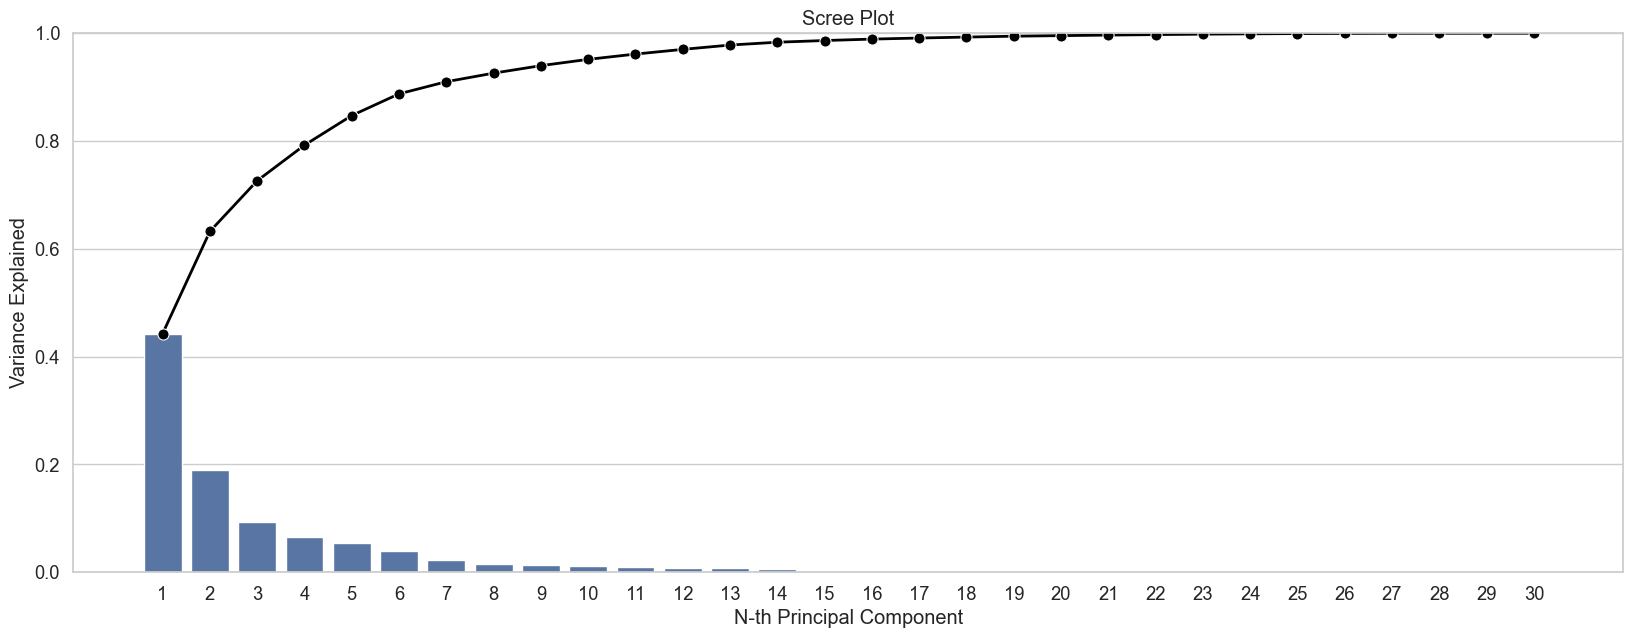

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    np.isclose(pca_explained_var_ratio_percentage[0], 4.42720256e+01, atol=1e-03)
Expected:
    True
Got:
    np.True_
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    np.isclose(pca_explained_var_ratio_percentage[29], 4.43482743e-04, atol=1e-03)
Expected:
    True
Got:
    np.True_
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    np.isclose(pca_cumulative_var_ratio_percentage[2], 72.63637091, atol=1e-03)
Expected:
    True
Got:
    np.True_
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    np.isclose(pca_cumulative_var_ratio_percentage[25], 99.96876117, atol=1e-03)
Expected:
    True
Got:
    np.True_
******************************

TestResults(failed=4, attempted=4)

In [9]:
# Step 5.

# Generate the explained variances and generate a Scree plot to view cumulative variances

# Generate explained variance ratio as a percentage.
pca_explained_var_ratio_percentage = pca.explained_variance_ratio_ * 100
print('Variances (percentage):', pca_explained_var_ratio_percentage)

# Generate cumulative variance ratios as a percentage.
pca_cumulative_var_ratio_percentage = np.cumsum(pca_explained_var_ratio_percentage)
print('Cumulative Variances (percentage):', pca_cumulative_var_ratio_percentage)


# Create a Scree Plot
# You may use the following code to generate your plot
PC_components = np.arange(pca.n_components_) + 1
sns.set(style='whitegrid', font_scale=1.2)
plt.subplots(figsize=(20, 7))
sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)
plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()



#For verification purposes - do not change code below this line.
import doctest

"""
  >>> np.isclose(pca_explained_var_ratio_percentage[0], 4.42720256e+01, atol=1e-03)
  True
  >>> np.isclose(pca_explained_var_ratio_percentage[29], 4.43482743e-04, atol=1e-03)
  True
  >>> np.isclose(pca_cumulative_var_ratio_percentage[2], 72.63637091, atol=1e-03)
  True
  >>> np.isclose(pca_cumulative_var_ratio_percentage[25], 99.96876117, atol=1e-03)
  True
"""

doctest.testmod()

**Step 6:**   

- Apply PCA with explained variance percentage (70%, 80%, 90%)
- How many PCs were retained for each of the explained variances?
- Note, you will need to rerun PCA with the n_components parameter set.
- Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [11]:
# Step 6:

# Apply PCA with explained variance percentage (70%, 80%, 90%)
# How many PCs were retained for each of the explained variances?
# Note, you will need to rerun PCA with the n_components parameter set.
# Print the pca components_ to observe the importance each feature contributes to each of the PCs.
# Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


# Setup n_components list with test percentages
n_components = [0.70, 0.80, 0.90]

# Init an empty list to store the number of Principal Components (PCs) retained.
pca_num_components = []

# Loop through all test conditions and train the PCA model.
# Store the number of PCs retained for each test condition in pca_num_components.
for i in n_components:
  pca = PCA(n_components=i)
  pca.fit(X_train_scaled)
  pca_num_components.append(pca.n_components_)

print('Number of PCs retained for each explained variance:', pca_num_components)


#For verification purposes - do not change code below this line.
import doctest

"""
  >>> print(int(pca_num_components[0]))
  3
  >>> print(int(pca_num_components[1]))
  5
  >>> print(int(pca_num_components[2]))
  7
"""

doctest.testmod()

Number of PCs retained for each explained variance: [np.int64(3), np.int64(5), np.int64(7)]


TestResults(failed=0, attempted=3)

**Step 9:**.  
 Transform the original scaled features into K PCs to retain AT LEAST 95% cumulative explained variance.
 Then rerun logistic regression on the reduced dataset.  
 Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform



In [13]:
# Step 9:
# Transform the original scaled features into K PCs to retain AT LEAST 95% cumulative explained variance,
# then rerun logistic regression on the reduced dataset.


# Initialize PCA reference with at least 95% cumulative explained variance.
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)
pca_num_components = pca.n_components_
print('Number of retained PCs:', pca_num_components)


# Transform original SCALED features into K PCs
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

#Rerun Logistic regression with reduced feature set
#    Use the transformed independent variables, and use the original y
#    Use the same train/test split as previous.
#    Generate training split (X_train_pca, X_test_pca, y_train, y_test)
#    Perform Logistic Regresssion using (X_train_scaled, y_train)
#    Generate score (e.g. _pca.score(X_test_pca, y_test))
X_train_pca, X_test_pca, y_train, y_test =  train_test_split(X_pca, y,
                                        test_size = 0.3,
                                        shuffle = True,
                                        random_state=random_state)
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

# Evaluate the model
log_reg_pca_score = log_reg_pca.score(X_test_pca, y_test)
print('Logistic regression model score on transformed dataset:', log_reg_pca_score)



#For verification purposes - do not change code below this line.
import doctest

"""
  >>> print(pca_num_components)
  10
  >>> np.isclose(log_reg_pca_score, 0.9766081871345029, atol=1e-03)
  True

"""

doctest.testmod()

Number of retained PCs: 10
(569, 10)
[[ 8.89142226  2.85709736 -1.59545501 ...  0.29344042  0.16900763
  -1.11056824]
 [ 2.64367714 -3.42934081 -0.77475479 ... -0.29833978  1.01769231
   0.44044061]
 [ 5.75141919 -0.49087436 -0.60506353 ... -0.11451378  0.05409256
   0.42144914]
 ...
 [ 1.40775479 -1.78218653  1.10871546 ... -0.59568962 -0.39216929
   0.73385966]
 [10.23772742  2.5086675  -0.97804441 ...  0.64681721  0.55956386
   0.12672673]
 [-5.48431229 -1.2085518   1.64247356 ... -1.38796123  0.22480948
  -0.47674518]]
Logistic regression model score on transformed dataset: 0.9766081871345029
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    np.isclose(log_reg_pca_score, 0.9766081871345029, atol=1e-03)
Expected:
    True
Got:
    np.True_
**********************************************************************
1 items had failures:
   1 of   2 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=2)

#Reflection questions:   

Review your notebook results and answer the following reflection questions:   

1. In the notebook, you should have observed that 3 principal components could explain approximately 70% of the variance in the breast cancer dataset which originally had 30 features. Explain why this dimensionality reduction is significant from both a computational and interpretability perspective. How might this impact your approach to similar high-dimensional medical datasets?
2. The notebook should have demonstrated that using PCA to retain about 95% of the variance (10 principal components) resulted in a classification accuracy of over 97%, compared to about 98% with all 30 original features. Discuss this trade-off between dimensionality reduction and model performance. What factors would you consider when deciding whether this reduction is worthwhile in a real-world medical diagnosis application?
3. When examining the results from Steps 5 and 6, you should have observed diminishing returns in the explained variance as more principal components were added. The first principal component should have explained over 44% of the variance, while later components contributed much less. Explain what this pattern tells you about the underlying structure of the breast cancer dataset, and how you might use this information when building predictive models for similar biomedical applications.